# Tolga Yazan 117200047 Cmpe 352 Homework3

In [ ]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [ ]:
from thinkdsp import read_wave

recording = read_wave('drive/MyDrive/117200047_Tolga_Yazan_Cmpe352_Hw03_recording.wav') # reading song 
recording.normalize()
recording.make_audio() # making audio

In [ ]:
print('Number of samples', (recording.ys))
print('Timestep in ms',  recording.framerate ) # to see framrate

Number of samples [0.         0.         0.         ... 0.00013097 0.0011787  0.00202999]
Timestep in ms 48000


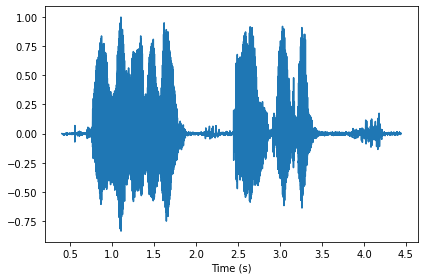

In [ ]:
from thinkdsp import decorate
start = 0.4 #the sample of segment created 
duration = 6.0
recording_segment = recording.segment(start, duration) # created segment between time duration 0.4-6.0
recording_segment.plot() 
decorate(xlabel='Time (s)')

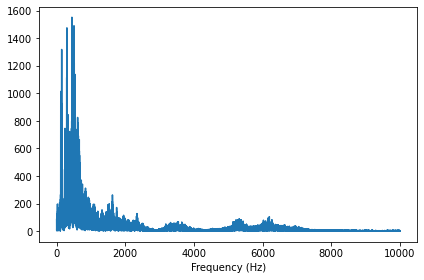

In [ ]:
recording_spectrum = recording_segment.make_spectrum() # created spectrum
recording_spectrum.plot(high=10000) # looking spectrum and frequency
decorate(xlabel='Frequency (Hz)')

In [ ]:
recording_wave= recording_spectrum.make_wave() # creating wave in order to merge

##Second Part

#With Brownian Noisy Sound

In [ ]:
from thinkdsp import BrownianNoise

signal = BrownianNoise()  # creating brownian sound
wave_brownian=signal.make_wave(duration=3, framerate=48000) # make wave with 48000 framerate, I choose that framrate...
wave_brownian.make_audio() # in order to merge signal.Also make audio


In [ ]:
mix_wave_with_brownian = recording_wave + wave_brownian # combine  with recording sound and brownian sound
mix_wave_with_brownian.make_audio() #  making combined sound  audio

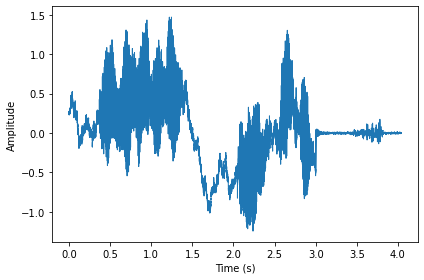

In [ ]:
mix_wave_with_brownian.plot(linewidth=1) # to see relation between  amplitute aand time 
decorate(xlabel='Time (s)',
         ylabel='Amplitude')

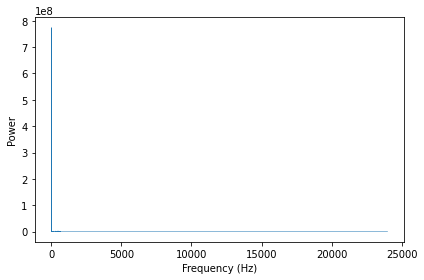

In [ ]:
spectrum_brownian = mix_wave_with_brownian.make_spectrum() # created spectrum
spectrum_brownian.plot_power(linewidth=0.5) # to see relation between power and frequency
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

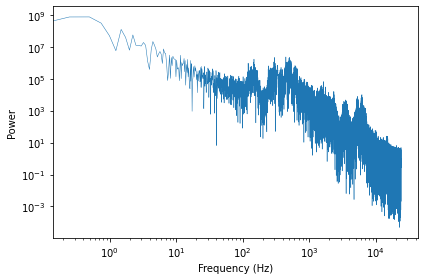

In [ ]:
spectrum_brownian.hs[0] = 0

spectrum_brownian.plot_power(linewidth=0.5)

loglog = dict(xscale='log', yscale='log') # we create loglog scale in order to get better view the power spectrum
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

#With Pink Noisy Sound

In [ ]:
from thinkdsp import PinkNoise
signal = PinkNoise(beta=1) # creating pink sound
wave_pink = signal.make_wave(duration=3, framerate=48000) # make wave with 48000 framerate, I choose that framrate..
wave_pink.make_audio() # in order to merge signal.Also make audio

In [ ]:
mix_wave_with_pink = recording_wave + wave_pink # combine  with recording sound and pink sound
mix_wave_with_pink.make_audio() #  making combined sound  audio

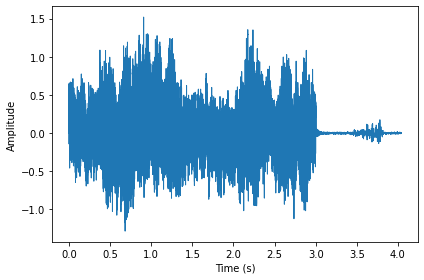

In [ ]:
mix_wave_with_pink.plot(linewidth=1) # to see relation between  amplitute aand time 
decorate(xlabel='Time (s)',
         ylabel='Amplitude')

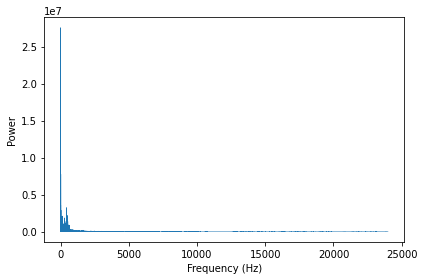

In [ ]:
spectrum_pink = mix_wave_with_pink.make_spectrum() # create spectrum
spectrum_pink.plot_power(linewidth=0.5) # to see relation between power and frequency
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

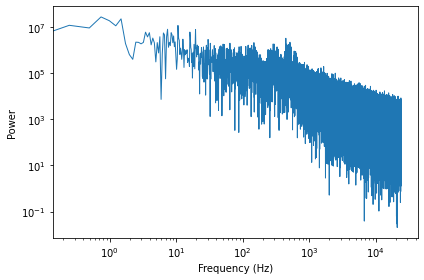

In [ ]:
spectrum_pink.hs[0] = 0
spectrum_pink.plot_power(linewidth=1) # we create loglog scale in order to get better view the power spectrum
    
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

#Third Part with Chirp 


In [ ]:
from thinkdsp import Chirp # 

signal = Chirp(start=220, end=880) # created chirp 
wave_chirp = signal.make_wave(duration=3,framerate=48000) #framerate is 48000 in order to merge sounds
wave_chirp.make_audio()

In [ ]:
mix_wave_with_chirp=wave_chirp+recording_wave # combined chirp sound and recording sound
mix_wave_with_chirp.make_audio() # making combine sound audio

#Fourth part , Filtered Operation

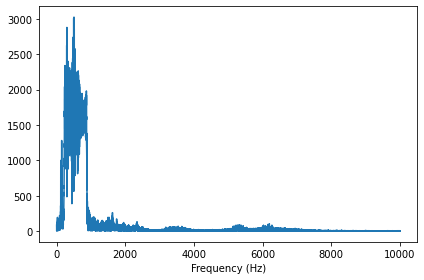

In [ ]:
from thinkdsp import decorate 
chirp_spectrum=mix_wave_with_chirp.make_spectrum() # made spectrum by using combined song (chirp + recording)
chirp_spectrum.plot(high=10000) # looking spectrum and frequency
decorate(xlabel='Frequency (Hz)')

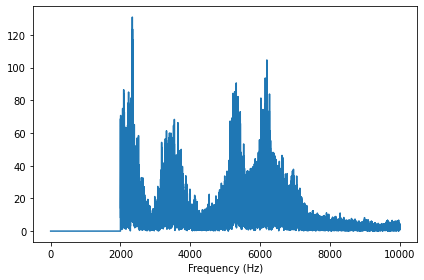

In [ ]:
chirp_spectrum.high_pass(2000) # filtering operation to cut sound under 2000 Hz , high pass operation
chirp_spectrum.plot(high=10000) # looking after filtered operation
decorate(xlabel='Frequency (Hz)')

In [ ]:
filtered_noisy = chirp_spectrum.make_wave() # filtered operation made 
filtered_noisy.make_audio() # making audio after filtered operation done and chirp sound filtered


In [ ]:
mix_wave_with_chirp.make_audio() # chirp and recording sound without filtered operation